In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('/content/drive/MyDrive/imarticus/stats/car.csv')

In [4]:
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.tail()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
1723,1723,low,low,5more,more,med,med,good
1724,1724,low,low,5more,more,med,high,vgood
1725,1725,low,low,5more,more,big,low,unacc
1726,1726,low,low,5more,more,big,med,good
1727,1727,low,low,5more,more,big,high,vgood


In [6]:
# Samples and features
print("Shape:", df.shape)

Shape: (1728, 8)


In [7]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   doors       1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boot    1728 non-null   object
 6   safety      1728 non-null   object
 7   class       1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [9]:
df.columns

Index(['Unnamed: 0', 'buying', 'maint', 'doors', 'persons', 'lug_boot',
       'safety', 'class'],
      dtype='object')

In [10]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1728.0,NaN,NaN,NaN,863.5,498.974949,0.0,431.75,863.5,1295.25,1727.0
buying,1728,4,vhigh,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maint,1728,4,vhigh,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doors,1728,4,2,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
persons,1728,3,2,576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lug_boot,1728,3,small,576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
safety,1728,3,low,576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,1728,4,unacc,1210,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Convert 'doors' column
df['doors'] = df['doors'].replace({'5more': 5}).astype(int)

# Convert 'persons' column
df['persons'] = df['persons'].replace({'more': 5}).astype(int)


In [12]:
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
# No nulls, but if any: fill with mode
df.fillna(df.mode().iloc[0], inplace=True)

# Convert categorical to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
cat_col = df.select_dtypes(include='object')
le = LabelEncoder()
for col in df[cat_col.columns]:
    df[col] = le.fit_transform(df[col])


In [14]:
# df.select_dtypes(include='object')
df.info()
# cat_col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1728 non-null   int64
 1   buying      1728 non-null   int64
 2   maint       1728 non-null   int64
 3   doors       1728 non-null   int64
 4   persons     1728 non-null   int64
 5   lug_boot    1728 non-null   int64
 6   safety      1728 non-null   int64
 7   class       1728 non-null   int64
dtypes: int64(8)
memory usage: 108.1 KB


In [15]:
# Original class values
# 0 = unacceptable, 1 = acceptable, 2 = good, 3 = very good
print(df['class'].value_counts())


class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


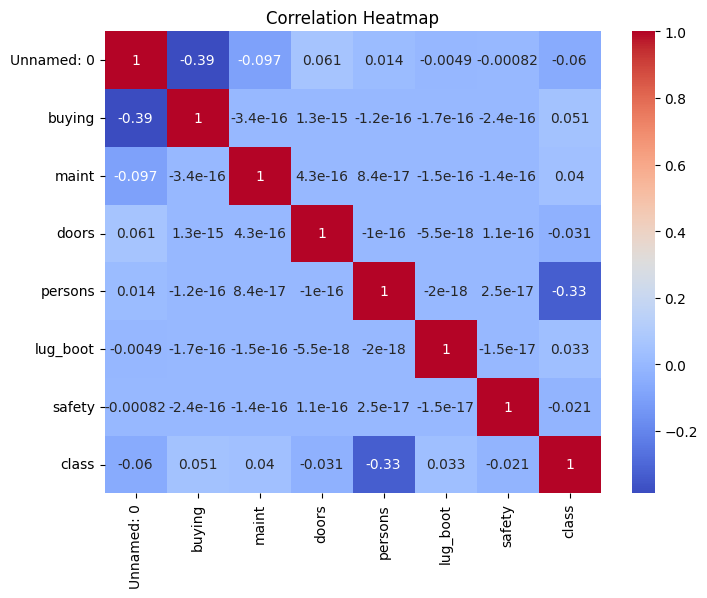

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

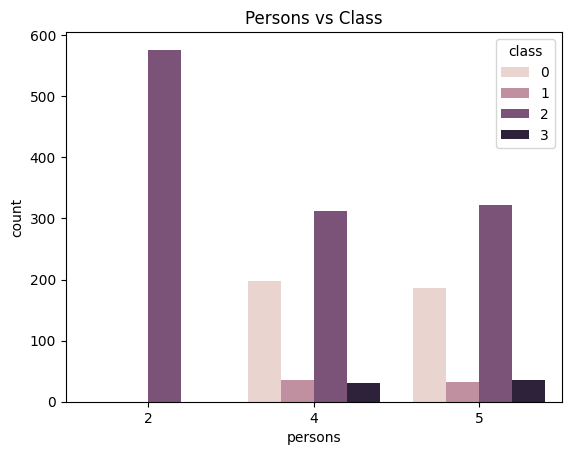

In [17]:
# Target vs Features (example: persons)
sns.countplot(x='persons', hue='class', data=df)
plt.title("Persons vs Class")
plt.show()


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [19]:
X = df.drop(['class','Unnamed: 0'], axis=1)
y = df['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.88      0.93        83
           1       0.59      0.91      0.71        11
           2       0.99      1.00      0.99       235
           3       0.94      0.94      0.94        17

    accuracy                           0.97       346
   macro avg       0.88      0.93      0.89       346
weighted avg       0.97      0.97      0.97       346



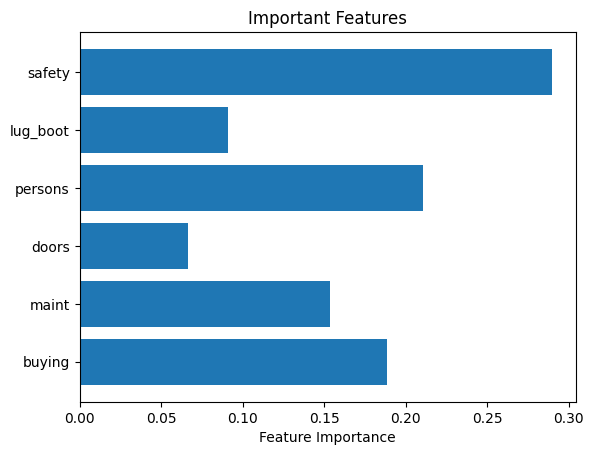

In [22]:
importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Important Features")
plt.show()


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [25]:
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name} F1 Score:", classification_report(y_test, y_pred, zero_division=0))


Logistic Regression F1 Score:               precision    recall  f1-score   support

           0       0.29      0.16      0.20        83
           1       0.00      0.00      0.00        11
           2       0.73      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.27      0.25       346
weighted avg       0.56      0.66      0.60       346

KNN F1 Score:               precision    recall  f1-score   support

           0       0.82      0.82      0.82        83
           1       0.50      0.36      0.42        11
           2       0.96      1.00      0.97       235
           3       0.90      0.53      0.67        17

    accuracy                           0.91       346
   macro avg       0.79      0.68      0.72       346
weighted avg       0.91      0.91      0.90       346

Decision Tree F1 Score:               precision    recall  f1-score   support

       